### Read Data Files

In [2]:
train <- read.csv('/Users/juhwikim/Desktop/MSDS/410 Supervised Learning/moneyball_train-1.csv')
test <- read.csv('/Users/juhwikim/Desktop/MSDS/410 Supervised Learning/moneyball_test-1.csv')

In [4]:
library(corrplot)
library(haven)

### Data Cleaning and Creating Additional Variables 

In [5]:
# Replacing NAs with Median in Train File
train$TEAM_BATTING_SO[is.na(train$TEAM_BATTING_SO)] <- median(train$TEAM_BATTING_SO, trim = 0, na.rm = TRUE)
train$TEAM_BATTING_HBP[is.na(train$TEAM_BATTING_HBP)] <- median(train$TEAM_BATTING_HBP, trim = 0, na.rm = TRUE)
train$TEAM_PITCHING_SO[is.na(train$TEAM_PITCHING_SO)] <- median(train$TEAM_PITCHING_SO, trim = 0, na.rm = TRUE)
train$TEAM_FIELDING_DP[is.na(train$TEAM_FIELDING_DP)] <- median(train$TEAM_FIELDING_DP, trim = 0, na.rm = TRUE)

# Replacing NAs with Median in Test File
test$TEAM_BATTING_SO[is.na(test$TEAM_BATTING_SO)] <- median(test$TEAM_BATTING_SO, trim = 0, na.rm = TRUE)
test$TEAM_BATTING_HBP[is.na(test$TEAM_BATTING_HBP)] <- median(test$TEAM_BATTING_HBP, trim = 0, na.rm = TRUE)
test$TEAM_PITCHING_SO[is.na(test$TEAM_PITCHING_SO)] <- median(test$TEAM_PITCHING_SO, trim = 0, na.rm = TRUE)
test$TEAM_FIELDING_DP[is.na(test$TEAM_FIELDING_DP)] <- median(test$TEAM_FIELDING_DP, trim = 0, na.rm = TRUE)

In [6]:
#Fix Baserun variables
train$FIX_TEAM_BASERUN_CS <- {ifelse (is.na(train$TEAM_BASERUN_CS), 1, 0)}
train$FIX_TEAM_BASERUN_SB <- {ifelse (is.na(train$TEAM_BASERUN_SB),1, 0)}
train$TEAM_BASERUN_SB[is.na(train$TEAM_BASERUN_SB)] <- 53
train$TEAM_BASERUN_CS[is.na(train$TEAM_BASERUN_CS)] <- 125

test$FIX_TEAM_BASERUN_CS <- {ifelse (is.na(test$TEAM_BASERUN_CS), 1, 0)}
test$FIX_TEAM_BASERUN_SB <- {ifelse (is.na(test$TEAM_BASERUN_SB),1, 0)}
test$TEAM_BASERUN_SB[is.na(test$TEAM_BASERUN_SB)] <- 53
test$TEAM_BASERUN_CS[is.na(test$TEAM_BASERUN_CS)] <- 125

In [7]:
#Truncated Variables
train$trunc_TEAM_BATTING <- {ifelse (train$TEAM_BATTING_H < 1122, 1122, ifelse (train$TEAM_BATTING_H > 2333, 2333, train$TEAM_BATTING_H))}
train$trunc_TEAM_BATTING_2B <- {ifelse (train$TEAM_BATTING_2B < 123, 123, ifelse (train$TEAM_BATTING_2B > 382, 382, train$TEAM_BATTING_2B))}
train$trunc_TEAM_BATTING_3B <- {ifelse (train$TEAM_BATTING_3B < 11, 11, ifelse (train$TEAM_BATTING_3B > 166, 166, train$TEAM_BATTING_3B))}
train$trunc_TEAM_BATTING_HR <- {ifelse (train$TEAM_BATTING_HR < 30, 30, ifelse (train$TEAM_BATTING_HR > 240, 240, train$TEAM_BATTING_HR))}

In [8]:
#Impute Truncated Variables in Test File
test$trunc_TEAM_BATTING <- {ifelse (test$TEAM_BATTING_H < 1122, 1122, ifelse (test$TEAM_BATTING_H > 2333, 2333, test$TEAM_BATTING_H))}
test$trunc_TEAM_BATTING_2B <- {ifelse (test$TEAM_BATTING_2B < 123, 123, ifelse (test$TEAM_BATTING_2B > 382, 382, test$TEAM_BATTING_2B))}
test$trunc_TEAM_BATTING_3B <- {ifelse (test$TEAM_BATTING_3B < 11, 11, ifelse (test$TEAM_BATTING_3B > 166, 166, test$TEAM_BATTING_3B))}
test$trunc_TEAM_BATTING_HR <- {ifelse (test$TEAM_BATTING_HR < 30, 30, ifelse (test$TEAM_BATTING_HR > 240, 240, test$TEAM_BATTING_HR))}

**In addition to variables added previously, I created few additional indicator variables:** 
1. TEAM_BATTING_GETON_BASE: combination of total hit, batter walking, and earning walk due to getting hit by a pitch Formula: TEAM_BATTING_H+TEAM_BATTING_BB+TEAM_BATTING_HBP
2. TEAM_HIT_DEFENSE: combination of total hit and walk along with successful double play minus fielding error to measure both the offensive success and defensive success Formula: TEAM_BATTING_H+TEAM_BATTING_BB+TEAM_BATTING_HBP+TEAM_FIELDING_DP-TEAM_FIELDING_E
3. TEAM_BASES_EARNED: bases earned using different weights for scoring Formula: 4 x trunc_TEAM_BATTING_HR)+ 3 x trunc_TEAM_BATTING_3B +2 x trunc_TEAM_BATTING_2B + 1 x TEAM_BATTING_1B  1 x TEAM_BATTING_BB_HBP + 1 x FIX_TEAM_BASERUN_SB -1 x FIX_TEAM_BASERUN_CS

In [9]:
#Adding additional variables
train$TEAM_BATTING_1B <- train$TEAM_BATTING_H-train$TEAM_BATTING_2B-train$TEAM_BATTING_3B-train$TEAM_BATTING_HR
train$TEAM_BATTING_H_RATIO <- train$TEAM_BATTING_H/(train$TEAM_BATTING_H+train$TEAM_BATTING_BB+train$TEAM_BATTING_HBP+train$TEAM_BATTING_SO)
train$TEAM_BATTING_BB_HBP <- (train$TEAM_BATTING_BB+train$TEAM_BATTING_HBP)
train$TEAM_BATTING_GETON_BASE <- (train$TEAM_BATTING_H+train$TEAM_BATTING_BB+train$TEAM_BATTING_HBP)
train$TEAM_HIT_DEFENSE <- (train$TEAM_BATTING_H+train$TEAM_BATTING_BB+train$TEAM_BATTING_HBP+train$TEAM_FIELDING_DP-train$TEAM_FIELDING_E)
train$TEAM_BASERUN_SB_RATE <- train$TEAM_BASERUN_SB/(train$TEAM_BASERUN_SB+train$TEAM_BASERUN_CS)
train$TEAM_PITCHING_SO_RATIO <- train$TEAM_PITCHING_SO/(train$TEAM_PITCHING_SO+train$TEAM_PITCHING_BB+train$TEAM_PITCHING_H+train$TEAM_PITCHING_HR)
train$TEAM_BASES_EARNED <- (4*train$trunc_TEAM_BATTING_HR)+(3*train$trunc_TEAM_BATTING_3B)+(2*train$trunc_TEAM_BATTING_2B)+(1*train$TEAM_BATTING_1B)+(1*train$TEAM_BATTING_BB_HBP)+(1*train$FIX_TEAM_BASERUN_SB)-(1*train$FIX_TEAM_BASERUN_CS)

In [10]:
#Adding additional variables in test file
test$TEAM_BATTING_1B <- test$TEAM_BATTING_H-test$TEAM_BATTING_2B-test$TEAM_BATTING_3B-test$TEAM_BATTING_HR
test$TEAM_BATTING_H_RATIO <- test$TEAM_BATTING_H/(test$TEAM_BATTING_H+test$TEAM_BATTING_BB+test$TEAM_BATTING_HBP+test$TEAM_BATTING_SO)
test$TEAM_BATTING_BB_HBP <- (test$TEAM_BATTING_BB+test$TEAM_BATTING_HBP)
test$TEAM_BATTING_GETON_BASE <- (test$TEAM_BATTING_H+test$TEAM_BATTING_BB+test$TEAM_BATTING_HBP)
test$TEAM_HIT_DEFENSE <- (test$TEAM_BATTING_H+test$TEAM_BATTING_BB+test$TEAM_BATTING_HBP+test$TEAM_BASERUN_SB+test$TEAM_FIELDING_DP-test$TEAM_FIELDING_E)
test$TEAM_BASERUN_SB_RATE <- test$TEAM_BASERUN_SB/(test$TEAM_BASERUN_SB+test$TEAM_BASERUN_CS)
test$TEAM_PITCHING_SO_RATIO <- test$TEAM_PITCHING_SO/(test$TEAM_PITCHING_SO+test$TEAM_PITCHING_BB+test$TEAM_PITCHING_H+test$TEAM_PITCHING_HR)
test$TEAM_BASES_EARNED <- (4*test$trunc_TEAM_BATTING_HR)+(3*test$trunc_TEAM_BATTING_3B)+(2*test$trunc_TEAM_BATTING_2B)+(1*test$TEAM_BATTING_1B)+(1*test$TEAM_BATTING_BB_HBP)+(1*test$FIX_TEAM_BASERUN_SB)-(1*test$FIX_TEAM_BASERUN_CS)

In [11]:
# Imputing Extreme Outliers using 1st and 99th percentile
#BASERUN_SB_RATE returned one NA value
train$TEAM_BASERUN_SB_RATE[is.na(train$TEAM_BASERUN_SB_RATE)] <- 0 #Change NA value with 0
#Replicate the step to Test file
test$TEAM_BASERUN_SB_RATE[is.na(test$TEAM_BASERUN_SB_RATE)] <- 0 #Change NA value with 0

#Create dataframe with imputed outliers
train99 <- train
train99$TEAM_BATTING_H[train99$TEAM_BATTING_H > 1945.500] <- 1945.500
train99$TEAM_BATTING_2B[train99$TEAM_BATTING_2B > 351.25] <- 351.25
train99$TEAM_BATTING_3B[train99$TEAM_BATTING_3B > 133.250] <- 133.250
train99$TEAM_BATTING_HR[train99$TEAM_BATTING_HR > 235.00] <- 235.00
train99$TEAM_BATTING_BB[train99$TEAM_BATTING_BB > 752.750] <- 752.750
train99$TEAM_BATTING_SO[train99$TEAM_BATTING_SO > 1191.25] <- 1191.25

train99$TEAM_BASERUN_SB[train99$TEAM_BASERUN_SB > 434.250] <- 434.250
train99$TEAM_BASERUN_CS[train99$TEAM_BASERUN_CS > 125.00] <- 125.00
train99$TEAM_BASERUN_SB[train99$TEAM_BATTING_HBP > 74.25] <- 74.25 
train99$TEAM_PITCHING_H[train99$TEAM_PITCHING_H > 7054.000] <- 7054.000
train99$TEAM_PITCHING_HR[train99$TEAM_PITCHING_HR > 244] <- 244
train99$TEAM_PITCHING_BB[train99$TEAM_PITCHING_BB > 921.00] <- 921.00
train99$TEAM_PITCHING_SO[train99$TEAM_PITCHING_SO > 1461.75] <- 1461.75 

train99$TEAM_FIELDING_E[train99$TEAM_FIELDING_E > 1228.000] <- 1228.000
train99$TEAM_FIELDING_DP[train99$TEAM_FIELDING_DP > 202.000] <- 202.000 

train99$TEAM_BATTING_1B[train99$TEAM_BATTING_1B > 1558.250] <- 1558.250
train99$TEAM_BATTING_H_RATIO[train99$TEAM_BATTING_H_RATIO > 0.9049695] <- 0.9049695

train99$TEAM_BATTING_BB_HBP[train99$TEAM_BATTING_BB_HBP > 807.750] <- 807.750
train99$TEAM_BATTING_GETON_BASE[train99$TEAM_GETON_BASE > 2488.0] <- 2488.0
train99$TEAM_HIT_DEFENSE[train99$TEAM_HIT_DEFENSE > 2424.00] <- 2424.00

train99$TEAM_BASERUN_SB_RATE[train99$TEAM_BASERUN_SB_RATE > 0.8008648] <- 0.8008648
train99$TEAM_PITCHING_SO_RATIO[train99$TEAM_PITCHING_SO_RATIO > 0.36787623] <- 0.36787623

#Replace Lower Outliers with 1st Cutoff Value
train99$TEAM_BATTING_H[train99$TEAM_BATTING_H < 1193.250] <- 1193.250
train99$TEAM_BATTING_2B[train99$TEAM_BATTING_2B < 141.75] <- 141.75
train99$TEAM_BATTING_3B[train99$TEAM_BATTING_3B < 17.000] <- 17.000
train99$TEAM_BATTING_HR[train99$TEAM_BATTING_HR < 4.75] <- 4.75
train99$TEAM_BATTING_BB[train99$TEAM_BATTING_BB < 79.000] <- 79.000
train99$TEAM_BATTING_SO[train99$TEAM_BATTING_SO < 72.00] <- 72.00

train99$TEAM_BASERUN_SB[train99$TEAM_BASERUN_SB < 24.000] <- 24.000
train99$TEAM_BASERUN_CS[train99$TEAM_BASERUN_CS < 18.750] <- 18.750
train99$TEAM_BASERUN_SB[train99$TEAM_BATTING_HBP < 45.00] <- 45.00
train99$TEAM_PITCHING_H[train99$TEAM_PITCHING_H < 1244.000] <- 1244.000
train99$TEAM_PITCHING_HR[train99$TEAM_PITCHING_HR < 8] <- 8
train99$TEAM_PITCHING_BB[train99$TEAM_PITCHING_BB < 240.00] <- 240.00
train99$TEAM_PITCHING_SO[train99$TEAM_PITCHING_SO < 241.00] <- 241.00 

train99$TEAM_FIELDING_E[train99$TEAM_FIELDING_E < 86.000] <- 86.000
train99$TEAM_FIELDING_DP[train99$TEAM_FIELDING_DP < 80.000] <- 80.000

train99$TEAM_BATTING_1B[train99$TEAM_BATTING_1B < 881.000] <- 881.000
train99$TEAM_BATTING_H_RATIO[train99$TEAM_BATTING_H_RATIO < 0.4280044] <- 0.4280044

train99$TEAM_BATTING_BB_HBP[train99$TEAM_BATTING_BB_HBP < 137.000] <- 137.000
train99$TEAM_BATTING_GETON_BASE[train99$TEAM_GETON_BASE < 1575.0] <- 1575.0 
train99$TEAM_HIT_DEFENSE[train99$TEAM_HIT_DEFENSE < 736.75] <- 736.75

train99$TEAM_BASERUN_SB_RATE[train99$TEAM_BASERUN_SB_RATE < 0.2076010] <- 0.2076010
train99$TEAM_PITCHING_SO_RATIO[train99$TEAM_PITCHING_SO_RATIO < 0.03293516] <- 0.03293516

test99 <- test
test99$TEAM_BATTING_H[test99$TEAM_BATTING_H > 1934.52] <- 1934.52
test99$TEAM_BATTING_2B[test99$TEAM_BATTING_2B > 340.68] <- 340.68
test99$TEAM_BATTING_3B[test99$TEAM_BATTING_3B > 136.68] <- 136.68
test99$TEAM_BATTING_HR[test99$TEAM_BATTING_HR > 208.78] <- 208.78
test99$TEAM_BATTING_BB[test99$TEAM_BATTING_BB > 753.98] <- 753.98
test99$TEAM_BATTING_SO[test99$TEAM_BATTING_SO > 1147.52] <- 1147.52

test99$TEAM_BASERUN_SB[test99$TEAM_BASERUN_SB > 418.74] <- 418.74
test99$TEAM_BASERUN_CS[test99$TEAM_BASERUN_CS > 127.52] <- 127.52
test99$TEAM_BASERUN_SB[test99$TEAM_BATTING_HBP > 73.42] <- 73.42 
test99$TEAM_PITCHING_H[test99$TEAM_PITCHING_H > 8817.06] <- 8817.06
test99$TEAM_PITCHING_HR[test99$TEAM_PITCHING_HR > 226.34] <- 226.34
test99$TEAM_PITCHING_BB[test99$TEAM_PITCHING_BB > 1131.04] <- 1131.04 
test99$TEAM_PITCHING_SO[test99$TEAM_PITCHING_SO > 1279.34] <- 1279.34

test99$TEAM_FIELDING_E[test99$TEAM_FIELDING_E > 1239.54] <- 1239.54
test99$TEAM_FIELDING_DP[test99$TEAM_FIELDING_DP > 202.42] <- 202.42

test99$TEAM_BATTING_1B[test99$TEAM_BATTING_1B > 1508.28] <- 1508.28
test99$TEAM_BATTING_H_RATIO[test99$TEAM_BATTING_H_RATIO > 0.8977210] <- 0.8977210

test99$TEAM_BATTING_BB_HBP[test99$TEAM_BATTING_BB_HBP > 815.98] <- 815.98
test99$TEAM_BATTING_GETON_BASE[test99$TEAM_GETON_BASE > 2537.98] <- 2537.98
test99$TEAM_HIT_DEFENSE[test99$TEAM_HIT_DEFENSE > 2653.24] <- 2653.24

test99$TEAM_BASERUN_SB_RATE[test99$TEAM_BASERUN_SB_RATE > 0.8941337] <- 0.8941337
test99$TEAM_PITCHING_SO_RATIO[test99$TEAM_PITCHING_SO_RATIO > 0.37525962] <- 0.37525962

#Replace Lower Outliers with 1st Cutoff Value
test99$TEAM_BATTING_H[test99$TEAM_BATTING_H < 1119.58] <- 1119.58
test99$TEAM_BATTING_2B[test99$TEAM_BATTING_2B < 117.16] <- 117.16
test99$TEAM_BATTING_3B[test99$TEAM_BATTING_3B < 18.58] <- 18.58
test99$TEAM_BATTING_HR[test99$TEAM_BATTING_HR < 5.00] <- 5.00
test99$TEAM_BATTING_BB[test99$TEAM_BATTING_BB < 89.96] <- 89.96
test99$TEAM_BATTING_SO[test99$TEAM_BATTING_SO < 59.08] <- 59.08

test99$TEAM_BASERUN_SB[test99$TEAM_BASERUN_SB < 17.58] <- 17.58
test99$TEAM_BASERUN_CS[test99$TEAM_BASERUN_CS < 15.48] <- 15.48
test99$TEAM_BASERUN_SB[test99$TEAM_BATTING_HBP < 50.74] <- 50.74
test99$TEAM_PITCHING_H[test99$TEAM_PITCHING_H < 1209.00] <- 1209.00
test99$TEAM_PITCHING_HR[test99$TEAM_PITCHING_HR < 9.16] <- 9.16 
test99$TEAM_PITCHING_BB[test99$TEAM_PITCHING_BB < 241.88] <- 241.88
test99$TEAM_PITCHING_SO[test99$TEAM_PITCHING_SO < 319.64] <- 319.64

test99$TEAM_FIELDING_E[test99$TEAM_FIELDING_E < 93.00] <- 93.00
test99$TEAM_FIELDING_DP[test99$TEAM_FIELDING_DP < 81.32] <- 81.32

test99$TEAM_BATTING_1B[test99$TEAM_BATTING_1B < 894.06] <- 894.06
test99$TEAM_BATTING_H_RATIO[test99$TEAM_BATTING_H_RATIO < 0.4310525] <- 0.4310525

test99$TEAM_BATTING_BB_HBP[test99$TEAM_BATTING_BB_HBP < 151.96] <- 151.96
test99$TEAM_BATTING_GETON_BASE[test99$TEAM_GETON_BASE < 1531.32] <- 1531.32
test99$TEAM_HIT_DEFENSE[test99$TEAM_HIT_DEFENSE < 504.66] <- 504.66

test99$TEAM_BASERUN_SB_RATE[test99$TEAM_BASERUN_SB_RATE < 0.2598948] <- 0.2598948
test99$TEAM_PITCHING_SO_RATIO[test99$TEAM_PITCHING_SO_RATIO < 0.02852929] <- 0.02852929


## Section 1. Modeling & More(100 points)

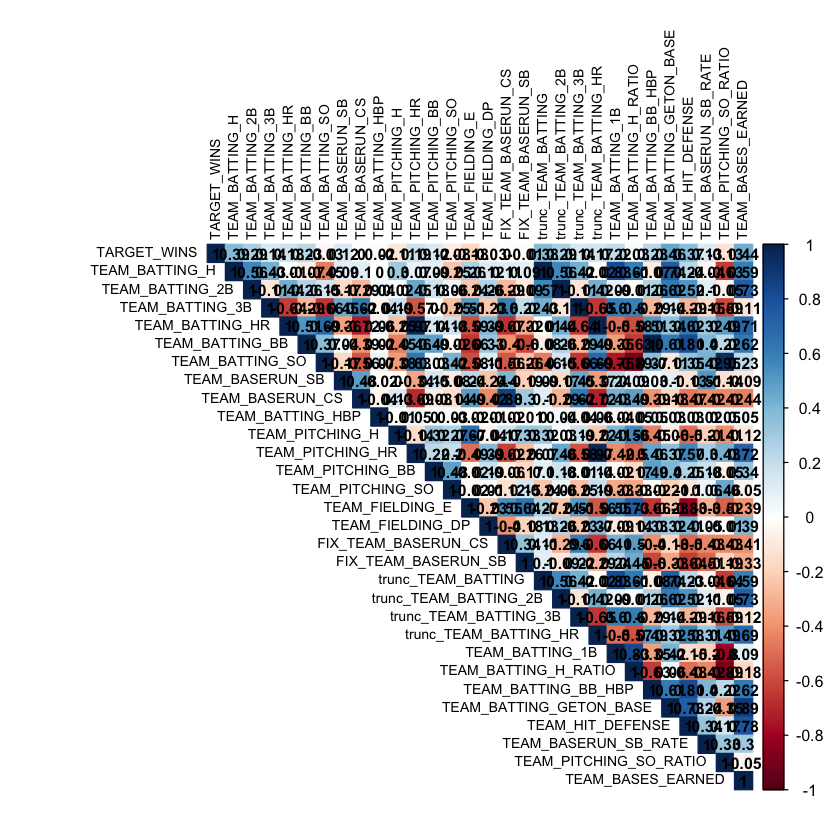

In [12]:
corrplot(cor(train[2:31], use="complete.obs"), method="color", type="upper", tl.col="black", tl.cex=.7, 
         addCoef.col="black", number.cex=.8)

* **I have used two different strategies to bucket Target Wins. First, I have tried seperating wins into three groups: Low, Medium, and High wins groups from 0-49, 50-99 and 100+. Secondly, I have used dummy variables to group it into four groups 0-40, 41-80, 81-120, and 120-162.**

In [59]:
# Creating buckets for Target Wins and Dummy Variables based on Wins
# Bucket 1
b <- c(-Inf, 50, 100, Inf)
names <- c("Low", "Medium", "High")
train$TARGET_WINS.Cat <- cut(train$TARGET_WINS, breaks = b, labels = names)
train99$TARGET_WINS.Cat <- cut(train99$TARGET_WINS, breaks = b, labels = names)

#Create separate data frames based on win categories
train99_Low_Wins <-train99[train99$TARGET_WINS.Cat == 'Low',]
train99_Med_Wins <-train99[train99$TARGET_WINS.Cat == 'Medium',]
train99_High_Wins <-train99[train99$TARGET_WINS.Cat == 'High',]

#Bucket 2
#Dummy variables train file
train$TARGET_WINS_DVG1 <- {ifelse (train$TARGET_WINS > 0 & train$TARGET_WINS <= 40, 1, 0)}
train$TARGET_WINS_DVG2 <- {ifelse (train$TARGET_WINS > 40 & train$TARGET_WINS <= 80, 1, 0)}
train$TARGET_WINS_DVG3 <- {ifelse (train$TARGET_WINS > 80 & train$TARGET_WINS <= 120, 1, 0)}
train$TARGET_WINS_DVG4 <- {ifelse (train$TARGET_WINS > 120 & train$TARGET_WINS <= 162, 1, 0)}
#Dummy variables train99 file
train99$TARGET_WINS_DVG1 <- {ifelse (train99$TARGET_WINS > 0 & train99$TARGET_WINS <= 40, 1, 0)}
train99$TARGET_WINS_DVG2 <- {ifelse (train99$TARGET_WINS > 40 & train99$TARGET_WINS <= 80, 1, 0)}
train99$TARGET_WINS_DVG3 <- {ifelse (train99$TARGET_WINS > 80 & train99$TARGET_WINS <= 120, 1, 0)}
train99$TARGET_WINS_DVG4 <- {ifelse (train99$TARGET_WINS > 120 & train99$TARGET_WINS <= 162, 1, 0)}


## Model 1

**For model 1, I have continued to test the best model chosen from assignment 1, using walk as a predictor variable for target wins.**

In [14]:
#Fitting Model 1 using overall Target Wins
model1_overall <- lm(TARGET_WINS ~ TEAM_BATTING_BB_HBP, data = train99)
summary(model1_overall)
coef(model1_overall)
anova(model1_overall)


Call:
lm(formula = TARGET_WINS ~ TEAM_BATTING_BB_HBP, data = train99)

Residuals:
    Min      1Q  Median      3Q     Max 
-68.220  -9.769   0.511   9.827  77.780 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         64.143386   1.520052   42.20   <2e-16 ***
TEAM_BATTING_BB_HBP  0.029753   0.002655   11.21   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.34 on 2274 degrees of freedom
Multiple R-squared:  0.05233,	Adjusted R-squared:  0.05191 
F-statistic: 125.6 on 1 and 2274 DF,  p-value: < 2.2e-16


(Intercept) TEAM_BATTING_BB_HBP 
        64.14338649          0.02975272

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
TEAM_BATTING_BB_HBP,1,29538.28,29538.2784,125.5613,2.096939e-28
Residuals,2274,534958.17,235.2499,NA,NA


In [15]:
qf(p=.05, df1=1, df2=2274, lower.tail=FALSE)

[1] 3.845551

* **Interpreting coefficient and explaining model 1 in context:** 
* **R-Squared -> 0.05191 Given this R-Squared value, only 5% of the variability in the response variable/walk is expalined within the model.**
* **T-Test for Walk (Beta 1) = 42.20 Since T-Test for Beta 1 does not equal to 0, hence, we can reject null hypothesis and that Walk is significant to overall model.**
* **F-value for walk = 125.6 F-value far exceeds the critival value as well as 0. Based on that, we can reject null hypothesis.**

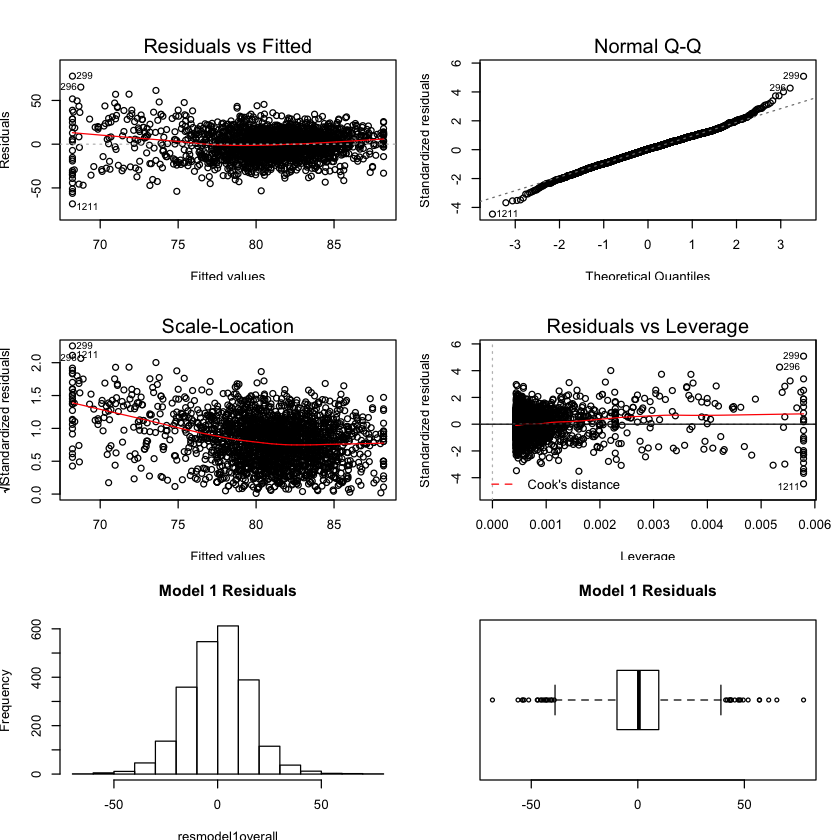

In [16]:
par(mfrow=c(3,2), mai=c(0.5,0.5,0.5,0.2))
resmodel1overall <- resid(model1_overall)
plot(model1_overall)
abline(0,0)
hist(resmodel1overall, main="Model 1 Residuals")
boxplot(resmodel1overall, main="Model 1 Residuals", horizontal=TRUE)

**There do appear to be outliers in both tails in model 1**

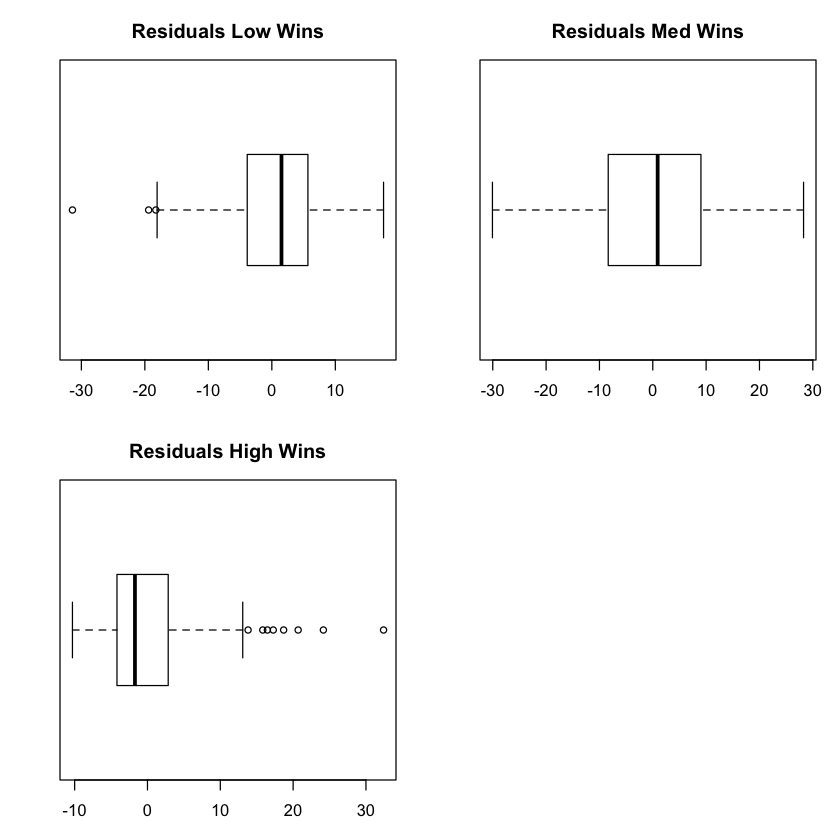

In [17]:
model1_low <- lm(TARGET_WINS ~ TEAM_BATTING_BB_HBP, data = train99_Low_Wins)
model1_med <- lm(TARGET_WINS ~ TEAM_BATTING_BB_HBP, data = train99_Med_Wins)
model1_high <- lm(TARGET_WINS ~ TEAM_BATTING_BB_HBP, data = train99_High_Wins)

par(mfrow=c(2,2), mai=c(0.5,0.5,0.5,0.2))
resmodel1low <- resid(model1_low)
resmodel1med <- resid(model1_med)
resmodel1high <- resid(model1_high)
boxplot(resmodel1low, main="Residuals Low Wins", horizontal=TRUE)
boxplot(resmodel1med, main="Residuals Med Wins", horizontal=TRUE)
boxplot(resmodel1high, main="Residuals High Wins", horizontal=TRUE)

In [18]:
#Testing against dummy Target Win buckets
model1_dv1 <- lm(TARGET_WINS_DVG1 ~ TEAM_BATTING_BB_HBP, data = train99)
model1_dv2 <- lm(TARGET_WINS_DVG2 ~ TEAM_BATTING_BB_HBP, data = train99)
model1_dv3 <- lm(TARGET_WINS_DVG3 ~ TEAM_BATTING_BB_HBP, data = train99)
model1_dv4 <- lm(TARGET_WINS_DVG4 ~ TEAM_BATTING_BB_HBP, data = train99)

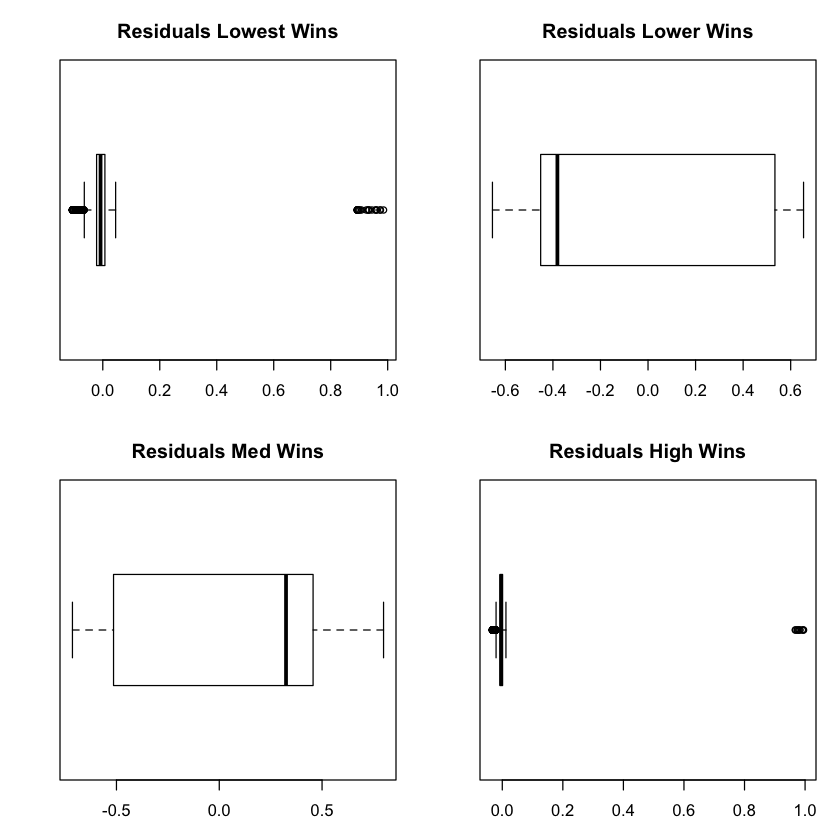

In [19]:
par(mfrow=c(2,2), mai=c(0.5,0.5,0.5,0.2))
resmodel1lwst <- resid(model1_dv1)
resmodel1lower <- resid(model1_dv2)
resmodel1med <- resid(model1_dv3)
resmodel1high <- resid(model1_dv4)
boxplot(resmodel1lwst, main="Residuals Lowest Wins", horizontal=TRUE)
boxplot(resmodel1lower, main="Residuals Lower Wins", horizontal=TRUE)
boxplot(resmodel1med, main="Residuals Med Wins", horizontal=TRUE)
boxplot(resmodel1high, main="Residuals High Wins", horizontal=TRUE)

**The outliers were mostly seen when predicting winning over 100+ games when wins are grouped into three categorical levels. When examining across four groups, outliers appeared in predicting <40 games or >120 games.**

**In Model 1 using the walk as a predictor variable, the P-Value and F-Value are strong to support rejecting null hypothesis and show a positive correlation with Target Wins. However, residual standard error is still 15.34 with low r-squared value which may indicate that it may not be the best continuous explanatory variable to predict wins. Therefore I will explore testing different variables or adding variables to examine "best" fit for the winning predictor.**

### Model 2

**Based on reviewing all single predictor variables against the target wins, I found that one single variable may not be sufficient enough to predict winning but rather requires multiple variables combined. To test the effect of Walk further, I have added variable the overall rate of getting on base into the model 1.**

In [20]:
model2_overall <- lm(TARGET_WINS ~ TEAM_BATTING_BB_HBP+TEAM_BATTING_GETON_BASE, data = train99)
summary(model2_overall)
coef(model2_overall)


Call:
lm(formula = TARGET_WINS ~ TEAM_BATTING_BB_HBP + TEAM_BATTING_GETON_BASE, 
    data = train99)

Residuals:
    Min      1Q  Median      3Q     Max 
-59.985  -8.745   0.407   9.298  48.389 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -3.321152   3.348705  -0.992 0.321414    
TEAM_BATTING_BB_HBP     -0.011414   0.003045  -3.748 0.000182 ***
TEAM_BATTING_GETON_BASE  0.044604   0.002017  22.109  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.92 on 2273 degrees of freedom
Multiple R-squared:  0.2201,	Adjusted R-squared:  0.2194 
F-statistic: 320.7 on 2 and 2273 DF,  p-value: < 2.2e-16


(Intercept)     TEAM_BATTING_BB_HBP TEAM_BATTING_GETON_BASE 
            -3.32115241             -0.01141387              0.04460373

* **Interpreting coefficient and explaining model 2 in context:** 
* **R-Squared -> 0.2194 Given this R-Squared value, 21.9% of the variability in the response variables (walk and overall rate of getting on the base) are expalined within the model.**
* **T-Test for Walk and overall getting on base rate (Beta 1 and 2) are -3.748 and 22.109. Since T-Test for Beta 1 and Beta 2 do not equal to 0 with smaller than 0.01 P-value, we can reject null hypothesis and that Walk and overall getting on base rate are significant to overall model.**
* **F-value for walk and overall getting on base rate = 320.7 F-value far exceeds the critival value as well as 0. Based on that, we can reject null hypothesis.**

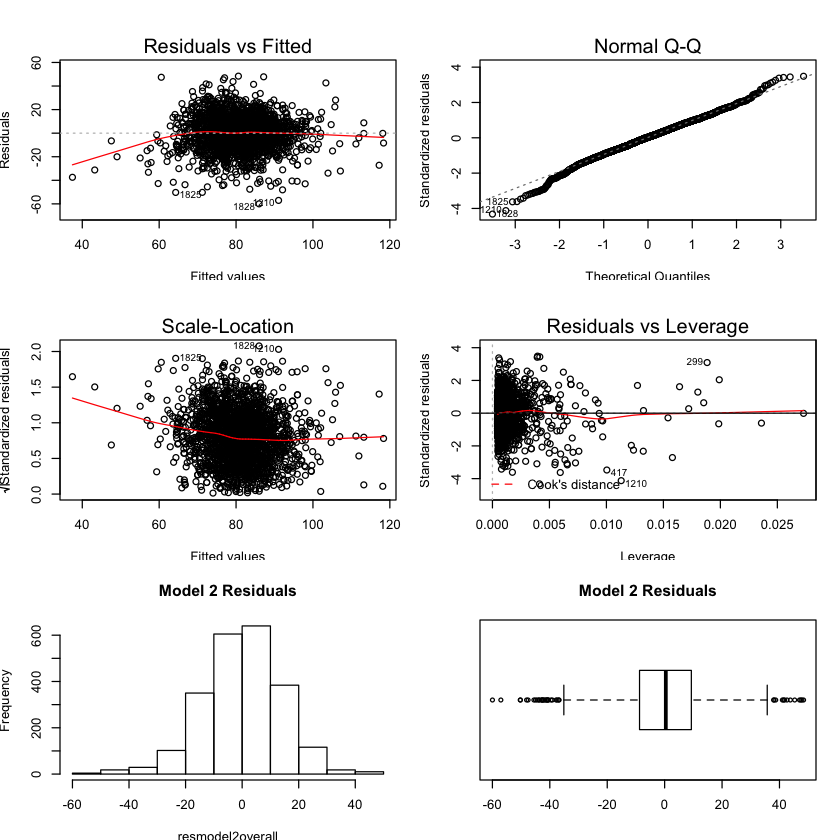

In [21]:
par(mfrow=c(3,2), mai=c(0.5,0.5,0.5,0.2))
resmodel2overall <- resid(model2_overall)
plot(model2_overall)
abline(0,0)
hist(resmodel2overall, main="Model 2 Residuals")
boxplot(resmodel2overall, main="Model 2 Residuals", horizontal=TRUE)

In [22]:
model2_low <- lm(TARGET_WINS ~ TEAM_BATTING_BB_HBP+TEAM_BATTING_GETON_BASE, data = train99_Low_Wins)
model2_med <- lm(TARGET_WINS ~ TEAM_BATTING_BB_HBP+TEAM_BATTING_GETON_BASE, data = train99_Med_Wins)
model2_high <- lm(TARGET_WINS ~ TEAM_BATTING_BB_HBP+TEAM_BATTING_GETON_BASE, data = train99_High_Wins)

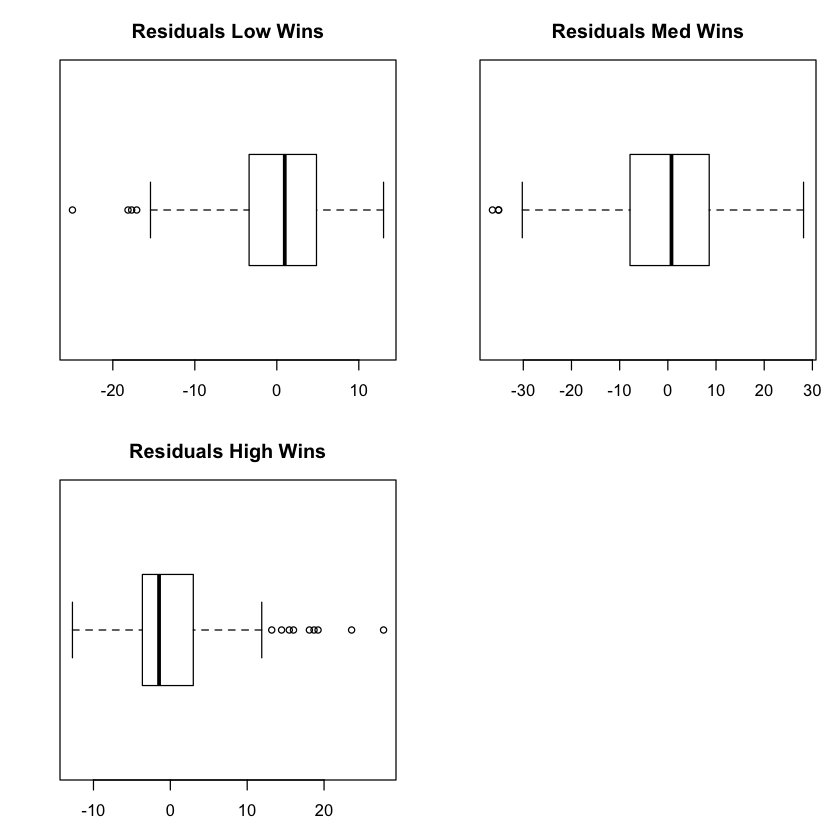

In [23]:
par(mfrow=c(2,2), mai=c(0.5,0.5,0.5,0.2))
resmodel2low <- resid(model2_low)
resmodel2med <- resid(model2_med)
resmodel2high <- resid(model2_high)
boxplot(resmodel2low, main="Residuals Low Wins", horizontal=TRUE)
boxplot(resmodel2med, main="Residuals Med Wins", horizontal=TRUE)
boxplot(resmodel2high, main="Residuals High Wins", horizontal=TRUE)

In [24]:
#Testing against dummy Target Win buckets
model2_dv1 <- lm(TARGET_WINS_DVG1 ~ TEAM_BATTING_BB_HBP+TEAM_BATTING_GETON_BASE, data = train99)
model2_dv2 <- lm(TARGET_WINS_DVG2 ~ TEAM_BATTING_BB_HBP+TEAM_BATTING_GETON_BASE, data = train99)
model2_dv3 <- lm(TARGET_WINS_DVG3 ~ TEAM_BATTING_BB_HBP+TEAM_BATTING_GETON_BASE, data = train99)
model2_dv4 <- lm(TARGET_WINS_DVG4 ~ TEAM_BATTING_BB_HBP+TEAM_BATTING_GETON_BASE, data = train99)

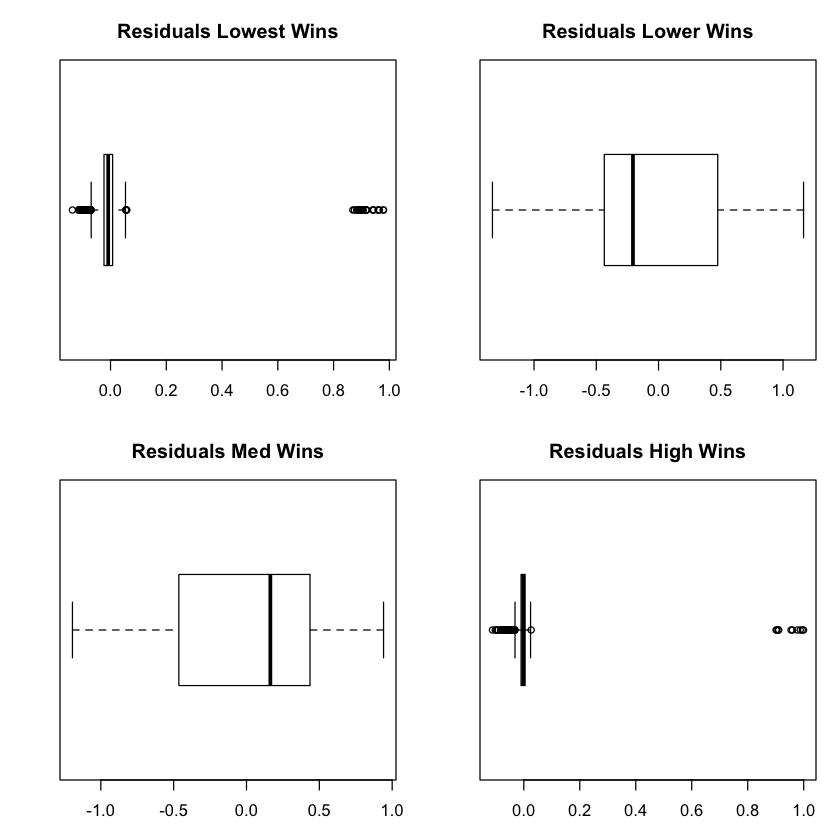

In [25]:
par(mfrow=c(2,2), mai=c(0.5,0.5,0.5,0.2))
resmodel2lwst <- resid(model2_dv1)
resmodel2lower <- resid(model2_dv2)
resmodel2med <- resid(model2_dv3)
resmodel2high <- resid(model2_dv4)
boxplot(resmodel2lwst, main="Residuals Lowest Wins", horizontal=TRUE)
boxplot(resmodel2lower, main="Residuals Lower Wins", horizontal=TRUE)
boxplot(resmodel2med, main="Residuals Med Wins", horizontal=TRUE)
boxplot(resmodel2high, main="Residuals High Wins", horizontal=TRUE)

### Model 3 

**For Model 3, I have decided to examine the multiple linear regression model using newly created predictors: truncated batting rate for double, triple and overall bases earned.**

In [26]:
model3_overall <- lm(TARGET_WINS ~ trunc_TEAM_BATTING_2B+trunc_TEAM_BATTING_3B+TEAM_BASES_EARNED, data = train99)
summary(model3_overall)
coef(model3_overall)


Call:
lm(formula = TARGET_WINS ~ trunc_TEAM_BATTING_2B + trunc_TEAM_BATTING_3B + 
    TEAM_BASES_EARNED, data = train99)

Residuals:
    Min      1Q  Median      3Q     Max 
-68.547  -8.582   0.478   9.014  55.172 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            9.610171   2.757705   3.485 0.000502 ***
trunc_TEAM_BATTING_2B -0.020671   0.009159  -2.257 0.024100 *  
trunc_TEAM_BATTING_3B  0.112502   0.010573  10.640  < 2e-16 ***
TEAM_BASES_EARNED      0.026032   0.001394  18.676  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.82 on 2272 degrees of freedom
Multiple R-squared:  0.2317,	Adjusted R-squared:  0.2307 
F-statistic: 228.4 on 3 and 2272 DF,  p-value: < 2.2e-16


(Intercept) trunc_TEAM_BATTING_2B trunc_TEAM_BATTING_3B 
           9.61017093           -0.02067146            0.11250219 
    TEAM_BASES_EARNED 
           0.02603192

* **Interpreting coefficient and explaining model 3 in context:** 
* **Adjusted R-Squared -> 0.2307 Given this R-Squared value, 23.07% of the variability in the response variables are expalined within the model.**
* **T-Test for truncated double, triple, and total bases (Beta 1,2,3) are -2.255, 10.621, and 18.678. T-Test for Beta 1, Beta 2, and Beta 3 are not equal to 0 with smaller than 0.05 P-value, we can reject null hypothesis and that these variables are significant to overall model.**
* **F-value = 228.4 F-value far exceeds the critival value as well as 0. Based on that, we can reject null hypothesis.**

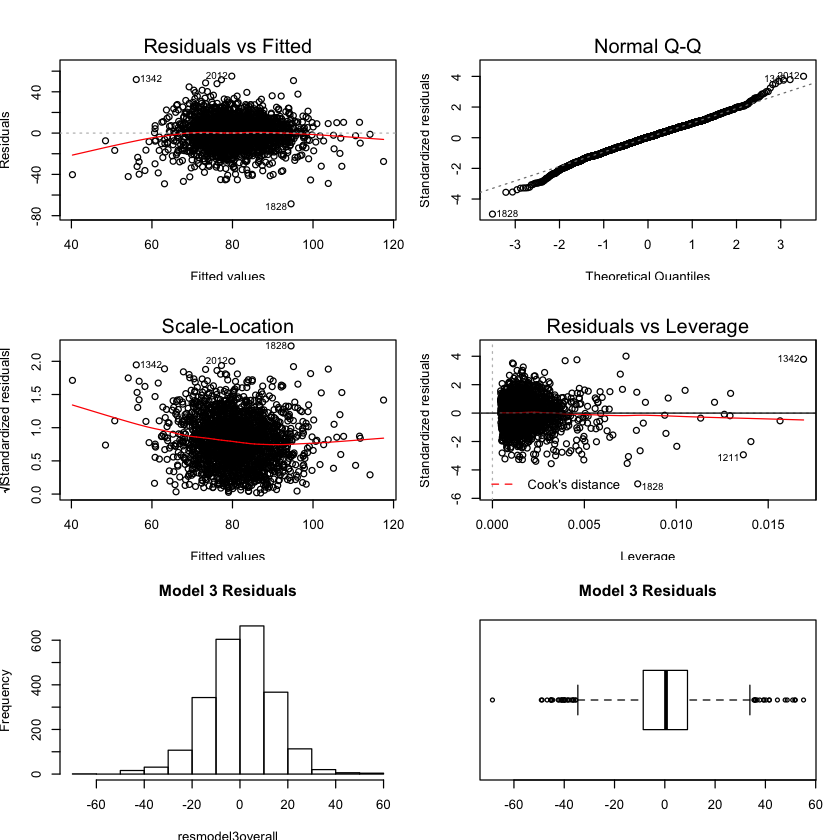

In [27]:
par(mfrow=c(3,2), mai=c(0.5,0.5,0.5,0.2))
resmodel3overall <- resid(model3_overall)
plot(model3_overall)
abline(0,0)
hist(resmodel3overall, main="Model 3 Residuals")
boxplot(resmodel3overall, main="Model 3 Residuals", horizontal=TRUE)

In [28]:
model3_low <- lm(TARGET_WINS ~ TEAM_HIT_DEFENSE+TEAM_BATTING_GETON_BASE+trunc_TEAM_BATTING, data = train99_Low_Wins)
model3_med <- lm(TARGET_WINS ~ TEAM_HIT_DEFENSE+TEAM_BATTING_GETON_BASE+trunc_TEAM_BATTING, data = train99_Med_Wins)
model3_high <- lm(TARGET_WINS ~ TEAM_HIT_DEFENSE+TEAM_BATTING_GETON_BASE+trunc_TEAM_BATTING, data = train99_High_Wins)

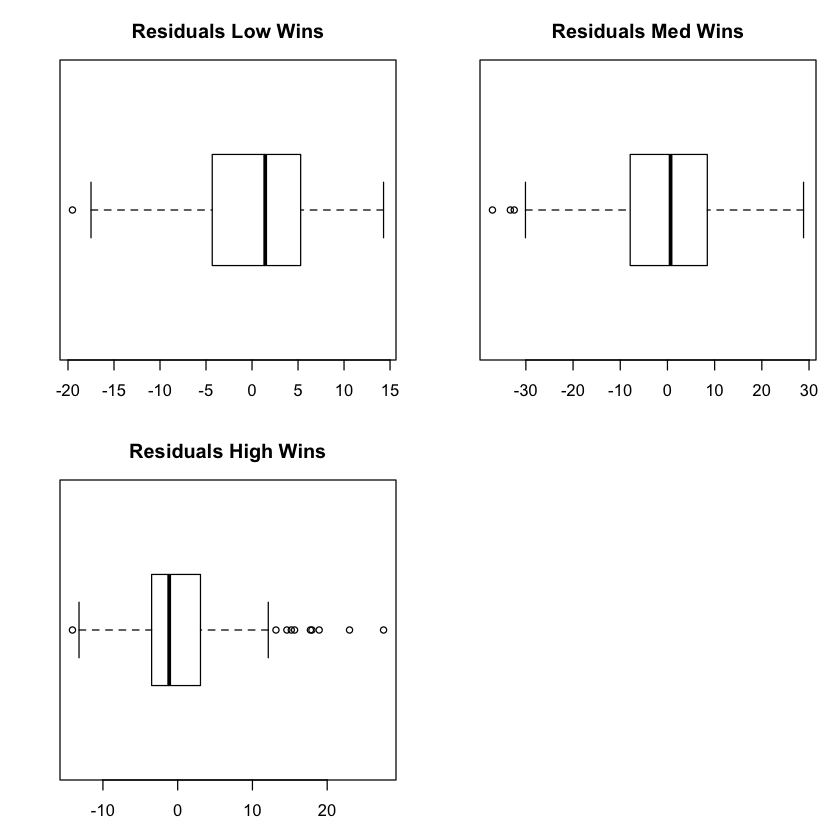

In [29]:
par(mfrow=c(2,2), mai=c(0.5,0.5,0.5,0.2))
resmodel3low <- resid(model3_low)
resmodel3med <- resid(model3_med)
resmodel3high <- resid(model3_high)
boxplot(resmodel3low, main="Residuals Low Wins", horizontal=TRUE)
boxplot(resmodel3med, main="Residuals Med Wins", horizontal=TRUE)
boxplot(resmodel3high, main="Residuals High Wins", horizontal=TRUE)

In [30]:
#Testing against dummy Target Win buckets
model3_dv1 <- lm(TARGET_WINS_DVG1 ~ TEAM_HIT_DEFENSE+TEAM_BATTING_GETON_BASE+trunc_TEAM_BATTING, data = train99)
model3_dv2 <- lm(TARGET_WINS_DVG2 ~ TEAM_HIT_DEFENSE+TEAM_BATTING_GETON_BASE+trunc_TEAM_BATTING, data = train99)
model3_dv3 <- lm(TARGET_WINS_DVG3 ~ TEAM_HIT_DEFENSE+TEAM_BATTING_GETON_BASE+trunc_TEAM_BATTING, data = train99)
model3_dv4 <- lm(TARGET_WINS_DVG4 ~ TEAM_HIT_DEFENSE+TEAM_BATTING_GETON_BASE+trunc_TEAM_BATTING, data = train99)

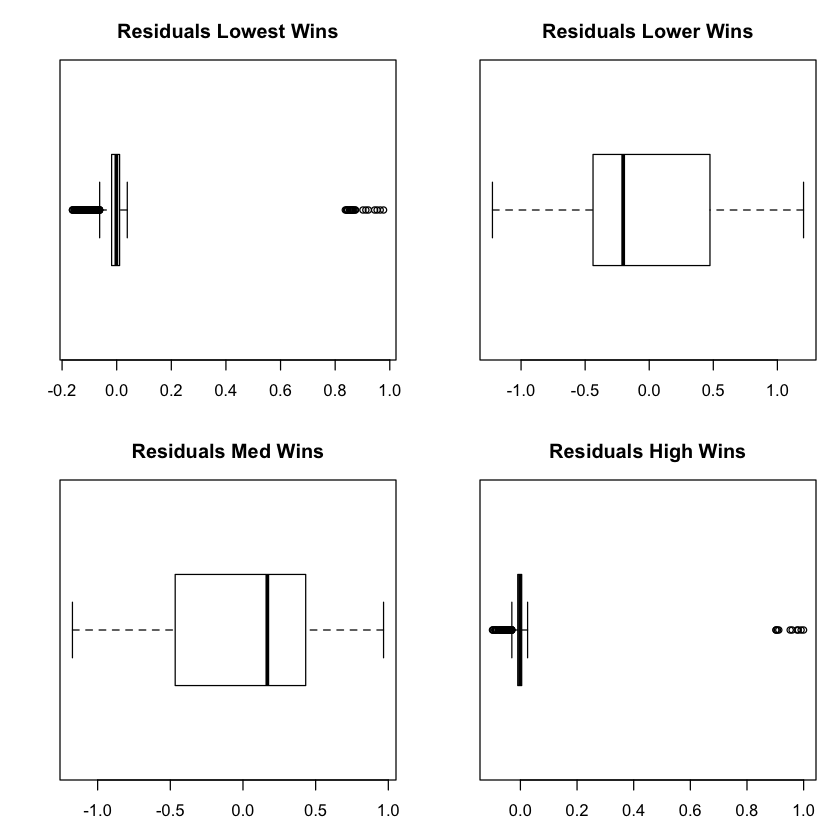

In [31]:
par(mfrow=c(2,2), mai=c(0.5,0.5,0.5,0.2))
resmodel3lwst <- resid(model3_dv1)
resmodel3lower <- resid(model3_dv2)
resmodel3med <- resid(model3_dv3)
resmodel3high <- resid(model3_dv4)
boxplot(resmodel3lwst, main="Residuals Lowest Wins", horizontal=TRUE)
boxplot(resmodel3lower, main="Residuals Lower Wins", horizontal=TRUE)
boxplot(resmodel3med, main="Residuals Med Wins", horizontal=TRUE)
boxplot(resmodel3high, main="Residuals High Wins", horizontal=TRUE)

**Similar to previous two models, outliers appear in predicting <40 or >120 games.**

### Model 4

**For model 4, I have added winning categorical variables (41-80 wins and 81-120 wins) to variables used in Model 3.**

In [66]:
model_4 <- lm(TARGET_WINS ~ TARGET_WINS_DVG2+TARGET_WINS_DVG3+trunc_TEAM_BATTING_2B+trunc_TEAM_BATTING_3B+TEAM_BASES_EARNED, data = train99)
summary(model_4)
coef(model_4)


Call:
lm(formula = TARGET_WINS ~ TARGET_WINS_DVG2 + TARGET_WINS_DVG3 + 
    trunc_TEAM_BATTING_2B + trunc_TEAM_BATTING_3B + TEAM_BASES_EARNED, 
    data = train99)

Residuals:
    Min      1Q  Median      3Q     Max 
-41.886  -5.966  -0.022   5.781  78.070 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           27.276262   2.416457  11.288  < 2e-16 ***
TARGET_WINS_DVG2       9.441338   1.658875   5.691 1.42e-08 ***
TARGET_WINS_DVG3      30.376303   1.678323  18.099  < 2e-16 ***
trunc_TEAM_BATTING_2B  0.003531   0.006428   0.549    0.583    
trunc_TEAM_BATTING_3B  0.054100   0.007502   7.211 7.51e-13 ***
TEAM_BASES_EARNED      0.010944   0.001027  10.659  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.643 on 2270 degrees of freedom
Multiple R-squared:  0.6261,	Adjusted R-squared:  0.6252 
F-statistic: 760.1 on 5 and 2270 DF,  p-value: < 2.2e-16


(Intercept)      TARGET_WINS_DVG2      TARGET_WINS_DVG3 
         27.276262205           9.441338141          30.376303046 
trunc_TEAM_BATTING_2B trunc_TEAM_BATTING_3B     TEAM_BASES_EARNED 
          0.003530807           0.054100304           0.010944256

* **Interpreting coefficient and explaining model 4 in context:** 
* **Adjusted R-Squared -> 0.6252 Given this R-Squared value, 62.52% of the variability in the response variables are expalined within the model.**
* **T-Test for beta 1 through 5 changed to 5.691, 18.099, 0.549, 7.211, 10.659. T-value for all but trunc_TEAM_BATTING_2B beta are not equal to 0 with smaller than 0.05 P-value. Whereas, trunc_TEAM_BATTING_2B is 0.583 leading to concluding that the variable may be removed from the model.**
* **F-value = 760.1 F-value far exceeds the critival value as well as 0. Based on that, we can reject null hypothesis.**

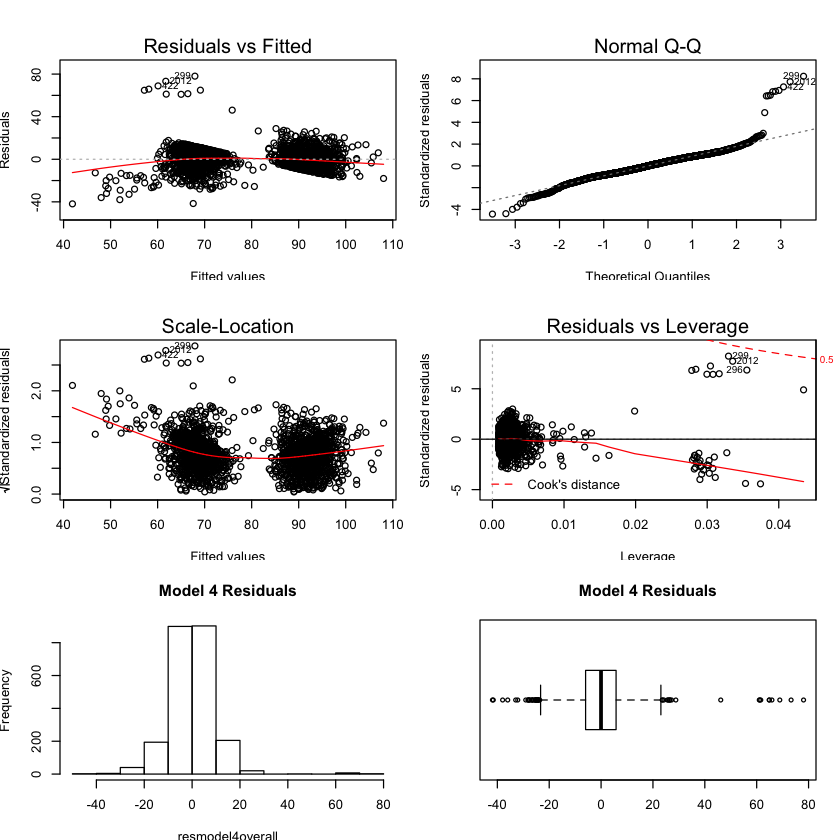

In [67]:
par(mfrow=c(3,2), mai=c(0.5,0.5,0.5,0.2))
resmodel4overall <- resid(model_4)
plot(model_4)
abline(0,0)
hist(resmodel4overall, main="Model 4 Residuals")
boxplot(resmodel4overall, main="Model 4 Residuals", horizontal=TRUE)

## Section 2. Model Comparison of Y versus log(Y) (20 points)

**For model comparison, I have decided to use truncated team batting rate, truncated batting double, truncated batting homerun and combined team hitting and field defense rate.**

In [69]:
model <- lm(TARGET_WINS ~ trunc_TEAM_BATTING+trunc_TEAM_BATTING_2B+trunc_TEAM_BATTING_HR+TEAM_HIT_DEFENSE, data = train99)
summary(model)
coef(model)


Call:
lm(formula = TARGET_WINS ~ trunc_TEAM_BATTING + trunc_TEAM_BATTING_2B + 
    trunc_TEAM_BATTING_HR + TEAM_HIT_DEFENSE, data = train99)

Residuals:
    Min      1Q  Median      3Q     Max 
-54.099  -8.866   0.050   9.093  57.212 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -1.700353   3.360822  -0.506 0.612952    
trunc_TEAM_BATTING     0.040937   0.002640  15.506  < 2e-16 ***
trunc_TEAM_BATTING_2B -0.031577   0.009220  -3.425 0.000626 ***
trunc_TEAM_BATTING_HR  0.009086   0.006840   1.328 0.184160    
TEAM_HIT_DEFENSE       0.015021   0.001285  11.687  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.88 on 2271 degrees of freedom
Multiple R-squared:  0.2249,	Adjusted R-squared:  0.2235 
F-statistic: 164.7 on 4 and 2271 DF,  p-value: < 2.2e-16


(Intercept)    trunc_TEAM_BATTING trunc_TEAM_BATTING_2B 
         -1.700352590           0.040937460          -0.031576903 
trunc_TEAM_BATTING_HR      TEAM_HIT_DEFENSE 
          0.009086393           0.015020821

In [70]:
car::vif(model)

trunc_TEAM_BATTING trunc_TEAM_BATTING_2B trunc_TEAM_BATTING_HR 
             1.675746              2.171432              1.833077 
     TEAM_HIT_DEFENSE 
             1.869080

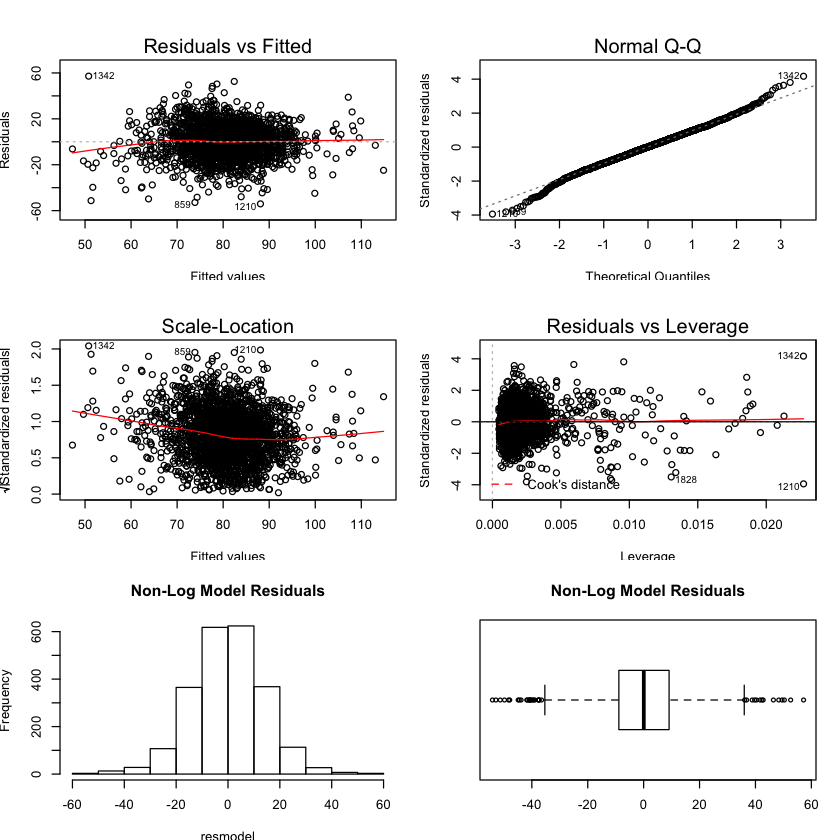

In [71]:
par(mfrow=c(3,2), mai=c(0.5,0.5,0.5,0.2))
resmodel <- resid(model)
plot(model)
abline(0,0)
hist(resmodel, main="Non-Log Model Residuals")
boxplot(resmodel, main="Non-Log Model Residuals", horizontal=TRUE)

In [72]:
#Because of error coming from log(0), I've redefined log function to fit the model 
log <- function(x) ifelse(x <= 0, 0, base::log(x))
modellog <- lm(log(TARGET_WINS) ~ trunc_TEAM_BATTING+trunc_TEAM_BATTING_2B+trunc_TEAM_BATTING_HR+TEAM_HIT_DEFENSE, data = train99)
summary(modellog)
coef(modellog)


Call:
lm(formula = log(TARGET_WINS) ~ trunc_TEAM_BATTING + trunc_TEAM_BATTING_2B + 
    trunc_TEAM_BATTING_HR + TEAM_HIT_DEFENSE, data = train99)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8947 -0.1007  0.0146  0.1198  0.7753 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            3.185e+00  5.085e-02  62.635  < 2e-16 ***
trunc_TEAM_BATTING     4.910e-04  3.994e-05  12.292  < 2e-16 ***
trunc_TEAM_BATTING_2B -4.014e-04  1.395e-04  -2.877  0.00405 ** 
trunc_TEAM_BATTING_HR  1.126e-05  1.035e-04   0.109  0.91335    
TEAM_HIT_DEFENSE       2.886e-04  1.945e-05  14.841  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.21 on 2271 degrees of freedom
Multiple R-squared:  0.2266,	Adjusted R-squared:  0.2252 
F-statistic: 166.3 on 4 and 2271 DF,  p-value: < 2.2e-16


(Intercept)    trunc_TEAM_BATTING trunc_TEAM_BATTING_2B 
         3.184971e+00          4.910047e-04         -4.014114e-04 
trunc_TEAM_BATTING_HR      TEAM_HIT_DEFENSE 
         1.126266e-05          2.886045e-04

In [73]:
car::vif(modellog)

trunc_TEAM_BATTING trunc_TEAM_BATTING_2B trunc_TEAM_BATTING_HR 
             1.675746              2.171432              1.833077 
     TEAM_HIT_DEFENSE 
             1.869080

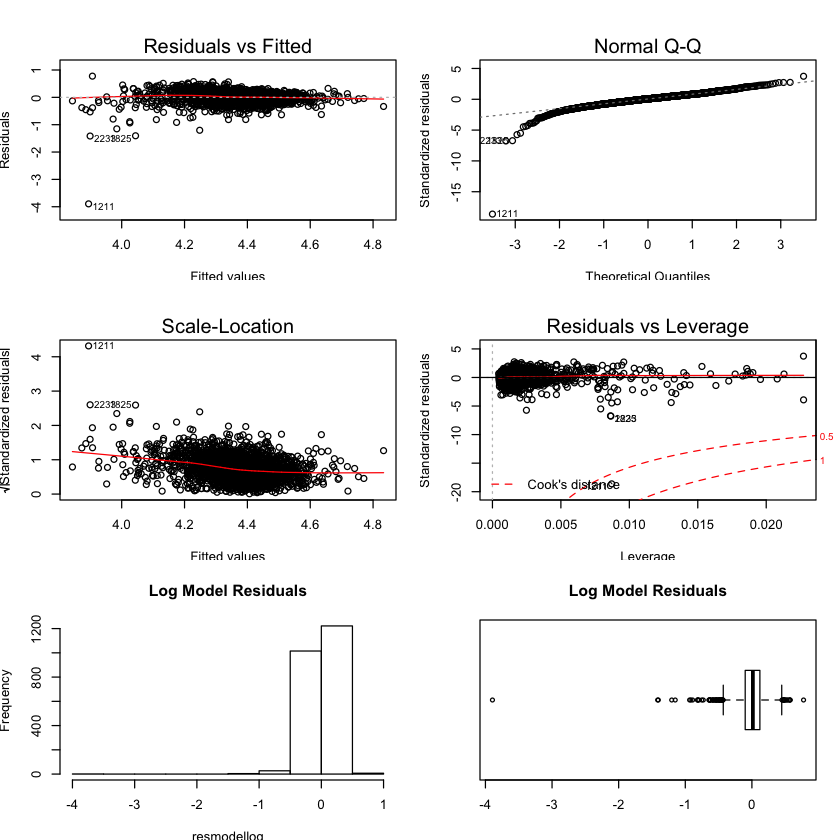

In [74]:
par(mfrow=c(3,2), mai=c(0.5,0.5,0.5,0.2))
resmodellog <- resid(modellog)
plot(modellog)
abline(0,0)
hist(resmodellog, main="Log Model Residuals")
boxplot(resmodellog, main="Log Model Residuals", horizontal=TRUE)

* **How do we interpret these two models?**

Interpreting coefficient and explaining model in context:
Adjusted R-Squared -> 0.2236 Given this R-Squared value, 22.36% of the variability in the response variables are expalined within the model.
T-Test for beta 1 through 4 are 15.506, -3.425, 1.328, 11.690. While T-values for all four variables are not equal to 0; therefore, they may be significant to predict target wins. 
F-value = 164.8 F-value far exceeds the critival value as well as 0. Based on that, we can reject null hypothesis.
However, P-value for trunc_TEAM_BATTING_HR and intercept are larger than the cut-off limit of 0.05. Therefore, this model may not be best fit to predict target wins. 

Interpreting coefficient and explaining model in context:
Transforming the response variable using the log function resulted in the Adjusted R-Squared value of 0.2253. Given this R-Squared value, 22.53% of the variability in the response variables are expalined within the model, which is slightly better than previous(non-log) model. 
T-Test for beta 1 through 4 changed to 12.292, -2.879,  0.107, 14.846. T-value for trunc_TEAM_BATTING_HR changed to be closer to 0, which may not support in rejecting null hypothesis. F-value = 166.4 F-value risen slightly from the non-log model, which we can reject null hypothesis. While P-value for intercept got smaller than the cut-off limit of 0.01/0.05, trunc_TEAM_BATTING_HR got larger. Based on this information, trunc_TEAM_BATTING_HR should not be retain in the fitting of the model but keep the rest of the predictor variables. 

* **How is the interpretation of the log(TARGET_WINS) model different from the price model?** 

Applying the log function to the response variable, standard error and p-value in true predictor variables have gotten smaller while p-value for non-significant variable got larger. 

* **Which model fits better?**

Log(Target_Wins) model fits slightly better with higher in terms of smaller residual standard error but adjusted R-squared value is only slightly better than the target wins model. 

* **Did the transformation of the response to log(TARGET_WINS) improve the model fit?**

Yes, based on the smaller residual standard error and larger R-squared value, log(TARGET_WINS) improved the model fit. 

* **In general when can a log transformation of the response variable improve the model fit?**

When error terms are not normally distributed, log transformation would help to improve the model fit. 

* **Should we consider any transformations to the predictors? If so, then fit one more model using any transformations that you find appropriate.**

We can also transform predictor variable (X) along with response variable (Y). For the comparison, I will use Model_3 and transform continues variables to see if it fits better than not applying log transformation. 

In [77]:
model3_a <- lm(TARGET_WINS ~ trunc_TEAM_BATTING_2B+trunc_TEAM_BATTING_3B+TEAM_BASES_EARNED, data = train99)
summary(model3_a)
coef(model3_a)
car::vif(model3_a)


Call:
lm(formula = TARGET_WINS ~ trunc_TEAM_BATTING_2B + trunc_TEAM_BATTING_3B + 
    TEAM_BASES_EARNED, data = train99)

Residuals:
    Min      1Q  Median      3Q     Max 
-68.547  -8.582   0.478   9.014  55.172 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            9.610171   2.757705   3.485 0.000502 ***
trunc_TEAM_BATTING_2B -0.020671   0.009159  -2.257 0.024100 *  
trunc_TEAM_BATTING_3B  0.112502   0.010573  10.640  < 2e-16 ***
TEAM_BASES_EARNED      0.026032   0.001394  18.676  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.82 on 2272 degrees of freedom
Multiple R-squared:  0.2317,	Adjusted R-squared:  0.2307 
F-statistic: 228.4 on 3 and 2272 DF,  p-value: < 2.2e-16


(Intercept) trunc_TEAM_BATTING_2B trunc_TEAM_BATTING_3B 
           9.61017093           -0.02067146            0.11250219 
    TEAM_BASES_EARNED 
           0.02603192

trunc_TEAM_BATTING_2B trunc_TEAM_BATTING_3B     TEAM_BASES_EARNED 
             2.162543              1.016021              2.166069

In [78]:
model3_b <- lm(log(TARGET_WINS) ~ trunc_TEAM_BATTING_2B+trunc_TEAM_BATTING_3B+TEAM_BASES_EARNED, data = train99)
summary(model3_b)
coef(model3_b)
car::vif(model3_b)


Call:
lm(formula = log(TARGET_WINS) ~ trunc_TEAM_BATTING_2B + trunc_TEAM_BATTING_3B + 
    TEAM_BASES_EARNED, data = train99)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7593 -0.0979  0.0182  0.1229  0.6896 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            3.294e+00  4.188e-02  78.645  < 2e-16 ***
trunc_TEAM_BATTING_2B -3.966e-04  1.391e-04  -2.852  0.00439 ** 
trunc_TEAM_BATTING_3B  1.367e-03  1.606e-04   8.512  < 2e-16 ***
TEAM_BASES_EARNED      4.075e-04  2.117e-05  19.252  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2098 on 2272 degrees of freedom
Multiple R-squared:  0.2277,	Adjusted R-squared:  0.2266 
F-statistic: 223.2 on 3 and 2272 DF,  p-value: < 2.2e-16


(Intercept) trunc_TEAM_BATTING_2B trunc_TEAM_BATTING_3B 
         3.2936544217         -0.0003966365          0.0013667727 
    TEAM_BASES_EARNED 
         0.0004075260

trunc_TEAM_BATTING_2B trunc_TEAM_BATTING_3B     TEAM_BASES_EARNED 
             2.162543              1.016021              2.166069

In [79]:
model3_c <- lm(log(TARGET_WINS) ~ log(trunc_TEAM_BATTING_2B)+log(trunc_TEAM_BATTING_3B)+log(TEAM_BASES_EARNED), data = train99)
summary(model3_c)
coef(model3_c)
car::vif(model3_c)


Call:
lm(formula = log(TARGET_WINS) ~ log(trunc_TEAM_BATTING_2B) + 
    log(trunc_TEAM_BATTING_3B) + log(TEAM_BASES_EARNED), data = train99)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4196 -0.0963  0.0157  0.1211  0.8003 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -4.43983    0.33283 -13.340  < 2e-16 ***
log(trunc_TEAM_BATTING_2B) -0.09988    0.03250  -3.074  0.00214 ** 
log(trunc_TEAM_BATTING_3B)  0.08353    0.00890   9.386  < 2e-16 ***
log(TEAM_BASES_EARNED)      1.14446    0.05494  20.830  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.206 on 2272 degrees of freedom
Multiple R-squared:  0.2556,	Adjusted R-squared:  0.2547 
F-statistic: 260.1 on 3 and 2272 DF,  p-value: < 2.2e-16


(Intercept) log(trunc_TEAM_BATTING_2B) 
               -4.43983261                -0.09987605 
log(trunc_TEAM_BATTING_3B)     log(TEAM_BASES_EARNED) 
                0.08353249                 1.14446366

log(trunc_TEAM_BATTING_2B) log(trunc_TEAM_BATTING_3B) 
                  2.210115                   1.030414 
    log(TEAM_BASES_EARNED) 
                  2.217873

**Following the above transformation, applying log transformation to both predictor variables as well as response variable fit the model better with higher adjusted R-squared value of 0.2547 and lower error rate of 0.206.**

## Section 3. SELECT MODELS (10Points)

**After comparing the coefficients across four models, I have decided to use Model 3 as the final model without applying log transformation to both predictor variables and response variable. Model_3 resulted in a P-value of 2.2e-16 and adjusted R-squared value of 0.2307 and F-statistic of 228.4. Based on the results, I can reject the null hypothesis.**

In [100]:
Final_Model <- lm(TARGET_WINS ~ trunc_TEAM_BATTING_2B+trunc_TEAM_BATTING_3B+TEAM_BASES_EARNED, data = train99)
summary(Final_Model)


Call:
lm(formula = TARGET_WINS ~ trunc_TEAM_BATTING_2B + trunc_TEAM_BATTING_3B + 
    TEAM_BASES_EARNED, data = train99)

Residuals:
    Min      1Q  Median      3Q     Max 
-68.547  -8.582   0.478   9.014  55.172 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            9.610171   2.757705   3.485 0.000502 ***
trunc_TEAM_BATTING_2B -0.020671   0.009159  -2.257 0.024100 *  
trunc_TEAM_BATTING_3B  0.112502   0.010573  10.640  < 2e-16 ***
TEAM_BASES_EARNED      0.026032   0.001394  18.676  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.82 on 2272 degrees of freedom
Multiple R-squared:  0.2317,	Adjusted R-squared:  0.2307 
F-statistic: 228.4 on 3 and 2272 DF,  p-value: < 2.2e-16


**Predicting Test data using Final Model**

In [101]:
df_train <- train[ , c("INDEX","trunc_TEAM_BATTING_2B","trunc_TEAM_BATTING_3B","TEAM_BASES_EARNED","TARGET_WINS")]
p <- predict(Final_Model, df_train)
P_TARGET_WINS <- predict(Final_Model, test99)
P_TARGET_WINS

1         2         3         4         5         6         7         8 
 67.15692  68.89587  73.80522  82.26418  66.58565  66.92328  76.32452  66.85558 
        9        10        11        12        13        14        15        16 
 72.41323  71.90889  73.02150  85.33464  86.59325  80.93375  76.25792  77.76662 
       17        18        19        20        21        22        23        24 
 72.63567  81.99254  66.49220  92.22165  83.73924  84.63800  86.64564  75.67128 
       25        26        27        28        29        30        31        32 
 79.00504  81.99814  61.04120  73.98231  83.35118  72.19102  92.87465  87.56327 
       33        34        35        36        37        38        39        40 
 88.72429  92.09877  84.57979  86.24553  77.86056  93.00485  83.23511  88.76829 
       41        42        43        44        45        46        47        48 
 82.29290  86.04982  50.47884  99.05493  85.32545  93.82566  94.31703  73.48327 
       49        50        51        52        53        54        55        56 
 71.50176  75.49462  77.13084  81.00884  81.25782  74.68047  75.67776  75.09862 
       57        58        59        60        61        62        63        64 
 87.84963  70.39377  65.13501  76.42646  81.56109  83.17867  83.80007  86.13344 
       65        66        67        68        69        70        71        72 
 81.49724  85.63528  76.38140  80.19629  75.39398  86.97807  90.83091  73.55472 
       73        74        75        76        77        78        79        80 
 85.21247  89.01760  77.74728  85.58791  82.78929  79.45813  68.32246  72.99945 
       81        82        83        84        85        86        87        88 
 86.09614  90.25732  98.51158  81.21178  88.62857  77.29086  76.68214  80.43034 
       89        90        91        92        93        94        95        96 
 81.11013  89.64344  76.85348  95.10497  73.07685  76.11653  73.93155  75.77377 
       97        98        99       100       101       102       103       104 
 87.38675  98.49829  90.16631  92.92977  84.52336  74.98924  83.50981  83.45528 
      105       106       107       108       109       110       111       112 
 82.98575  77.91562  65.65306  81.26498  86.61576  68.55664  84.03063  81.42667 
      113       114       115       116       117       118       119       120 
 87.07479  85.89424  79.48299  79.47040  88.73890  80.81264  76.88833  74.04011 
      121       122       123       124       125       126       127       128 
 86.54113  66.81818  67.89863  62.21015  71.30080  82.59322  88.56273  74.70331 
      129       130       131       132       133       134       135       136 
 89.21719  94.04365  85.96406  77.64774  73.10924  82.35721  84.92544  69.56838 
      137       138       139       140       141       142       143       144 
 77.65014  75.17314  76.59732  77.95602  65.63886  70.95307  92.69017  80.48609 
      145       146       147       148       149       150       151       152 
 75.20023  77.45992  81.99018  80.79324  82.79927  81.38692  85.01079  77.37547 
      153       154       155       156       157       158       159       160 
 62.47209  70.31992  74.51116  70.72746  87.80230  73.33010  91.38477  71.23857 
      161       162       163       164       165       166       167       168 
108.18707 105.82508  92.53457 108.06516 101.76133  94.62463  87.72104  82.50854 
      169       170       171       172       173       174       175       176 
 72.47579  80.43402  87.28110  82.81041  82.32192  88.66282  84.52905  78.95528 
      177       178       179       180       181       182       183       184 
 80.28223  78.10291  77.15002  81.02226  76.73747  86.32033  81.84259  87.09312 
      185       186       187       188       189       190       191       192 
 97.75859  85.84926  89.19853  71.85208  65.97162 102.15735  69.82019  78.33356 
      193       194       195       196       197       198       199       200 
 73.18453  75.31136  77.03976  68.79721

## Section 4. Model Formula (10 Points)

**Formula for added metrics**
* TEAM_BATTING_1B: TEAM_BATTING_H - TEAM_BATTING_2B - TEAM_BATTING_3B - TEAM_BATTING_HR
* TEAM_BATTING_H_RATIO: TEAM_BATTING_H / (TEAM_BATTING_H + TEAM_BATTING_BB + TEAM_BATTING_HBP + TEAM_BATTING_SO)
* TEAM_BATTING_WALK: TEAM_BATTING_BB + TEAM_BATTING_HBP
* TEAM_BASERUN_SB_RATE: TEAM_BASERUN_SB / (TEAM_BASERUN_SB + TEAM_BASERUN_CS)
* TEAM_PITCHING_SO_RATIO: TEAM_PITCHING_SO / (TEAM_PITCHING_SO + TEAM_PITCHING_BB + TEAM_PITCHING_H + TEAM_PITCHING_HR)
* TEAM_BATTING_GETON_BASE: combination of total hit, batter walking, and earning walk due to getting hit by a pitch Formula: TEAM_BATTING_H+TEAM_BATTING_BB+TEAM_BATTING_HBP
* TEAM_HIT_DEFENSE: combination of total hit and walk along with successful double play minus fielding error to measure both the offensive success and defensive success Formula: * TEAM_BATTING_H+TEAM_BATTING_BB+TEAM_BATTING_HBP+TEAM_FIELDING_DP-TEAM_FIELDING_E
* TEAM_BASES_EARNED: bases earned using different weights for scoring Formula: 4 x trunc_TEAM_BATTING_HR)+ 3 x trunc_TEAM_BATTING_3B +2 x trunc_TEAM_BATTING_2B + 1 x TEAM_BATTING_1B 1 x TEAM_BATTING_BB_HBP + 1 x FIX_TEAM_BASERUN_SB -1 x FIX_TEAM_BASERUN_CS

### Equation for Final Model:
Yi = 9.610171  +  -0.020671*x1 + 0.112502*x2 + 0.026032*x3 + Ei
- E ~ N(0, 13.82**2)

## Section 5.SCORED DATA FILE(10 POINTS)

In [95]:
df_out <- data.frame(p,train99$TARGET_WINS,train99$INDEX)
head(df_out, n=5)

p,train99.TARGET_WINS,train99.INDEX
64.92645,39,1
82.68055,70,2
79.85222,86,3
74.26116,70,4
70.77082,82,5


In [96]:
mse <- sqrt(mean((p - df_out$train99.TARGET_WINS)^2, na.rm=TRUE))
round(mse, digits = 0)

[1] 14

In [97]:
df_test_out <- data.frame(P_TARGET_WINS,test$INDEX)
head(df_test_out, n=5)

P_TARGET_WINS,test.INDEX
66.72289,9
68.77222,10
74.83816,14
82.60294,47
67.76727,60


In [98]:
write.csv(df_test_out, '/Users/juhwikim/Desktop/MSDS/410 Supervised Learning/MA2_Output.csv', row.names = TRUE)